In [6]:
train_dir=r'C:\Users\Abirami\Desktop\smartinternz\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set'
test_dir=r'C:\Users\Abirami\Desktop\smartinternz\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set'

In [2]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\Abirami\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Abirami\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Abirami\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Abirami\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [7]:
train_datagen=ImageDataGenerator(rescale=1)
test_datagen=ImageDataGenerator(rescale=1)

x_train=train_datagen.flow_from_directory(train_dir,target_size=(128,128),batch_size=32,class_mode='categorical')  
x_test=test_datagen.flow_from_directory(test_dir,target_size=(128,128),batch_size=32,class_mode='categorical')

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


# Model

In [9]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(9,activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)      

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model_history=model.fit_generator(
        x_train,
        steps_per_epoch=100,   ## no. of images(2000)/batch size(20)
        epochs=20,
        )

Epoch 1/20
100/100 [==============================] - 47s 467ms/step - loss: 3.5015 - acc: 0.3535
Epoch 2/20
100/100 [==============================] - 49s 491ms/step - loss: 1.2029 - acc: 0.5778
Epoch 3/20
100/100 [==============================] - 51s 508ms/step - loss: 0.9777 - acc: 0.6509
Epoch 4/20
100/100 [==============================] - 51s 512ms/step - loss: 0.7650 - acc: 0.7222
Epoch 5/20
100/100 [==============================] - 53s 525ms/step - loss: 0.7051 - acc: 0.7461
Epoch 6/20
100/100 [==============================] - 55s 554ms/step - loss: 0.6328 - acc: 0.7725
Epoch 7/20
100/100 [==============================] - 53s 534ms/step - loss: 0.5426 - acc: 0.8097
Epoch 8/20
100/100 [==============================] - 53s 529ms/step - loss: 0.4442 - acc: 0.8397
Epoch 9/20
100/100 [==============================] - 56s 563ms/step - loss: 0.3999 - acc: 0.8632
Epoch 10/20
100/100 [==============================] - 54s 544ms/step - loss: 0.4188 - acc: 0.8603
Epoch 11/20
100/100

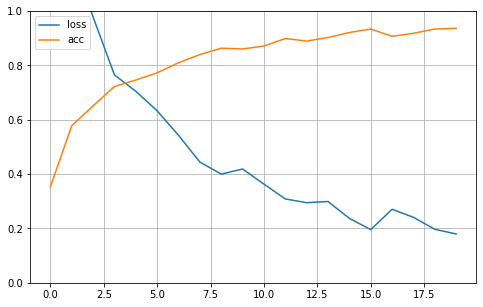

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.save('vegetable.h5')